<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> Álgebra Lineal Numérica IMT2111</h1></center>
<center><h1 style="color:#173F8A;"> Capitulo 1: Metodo de Elementos Finitos</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## FEM 1d

**Metodo de Elementos Finitos (FEM) para el problema de Poisson en 1d.**

Considere la ecuacion de Poisson en el intervalo $\Omega = (0,1)$

\begin{equation} -u''(x) = f(x) \quad \mbox{in } \Omega,  \qquad u = 0 \quad\mbox{on } \partial \Omega\end{equation}

Testeamos la ecuacion por una funcion $v\in V = H_{0}^{1}(\Omega) := \{ v\in H^{1}(\Omega): v|_{\partial \Omega} = 0 \}$, e integramos sobre $\Omega$ 

\begin{equation}
-\int_{\Omega}u'' \,v = \int_{\Omega}f\, v
\end{equation}

Ahora integramos por partes y obtenemos la formualcion debil del problema de Poisson con condiciothe weak formulation of the Poisson problem:  Find $u \in V$ such that

\begin{equation}
a(u,v)= (f,v),\qquad \mbox{donde }\quad a(u,v):= \int_{\Omega}u'\,v'\quad \mbox{and}\quad (f,v)_{\Omega}:=\int_{\Omega}f\,v. 
\end{equation}

Discretizamos usando el metodo de elementos finitos de Lagrange

### Esquema de Galerkin 

Discretizamos el espacion funcional de dimension infinita $V$. Considere un espacio de dimension finita$V_{h}\subset V$. Entonces, el esquema de Galerkin queda:
Hallar $u_{h}\in V_{h}$ tal que

\begin{equation}
a(u_{h},v) = (f,v),\qquad \mbox{para todo } v\in V_{h}.
\end{equation}

Observe que ahora tenemos un sistema de ecuaciones de dimension finita, donde las incognitas son los coeficientes de $u_h$ en terminos de una base del espacio $V_h$. Aun no tenemos un metodo, necesitamos escoger el subespacio de dimension finita $V_{h}$. 

Comenzamos con el subespacio clasico de polinomos lineales a trozos y continuos.

Definimos primero una sucesion de puntos $0=x_0<x_1<...<x_n =1$, los cuales particionan el dominio $\Omega = (0,1)$ en subintervalos $K_{j} = (x_{j}, x_{j+1})$, para $j=0,...n-1$ y hacemos

\begin{equation}
h_{j} = |K_{j}| = x_{j+1} - x_j\quad \mbox{para } j=0,...,n-1, \qquad \mbox{y }\quad h =\max_{0\leq j\leq n-1} h_{j} 
\end{equation}

Entonces, definimos la malla $\mathcal{T}_{h} = \{ K\}_{h}$ como la coleccion de estos subintervalos.

Definimos el espacio de funciones continuas y lineales a trozos

\begin{equation}
V_{h} = \{ v\in C(\Omega): v|_{K}\in \mathbb{P}^{1}(K),\,\forall K\in \mathcal{T}_{h} \}
\end{equation}


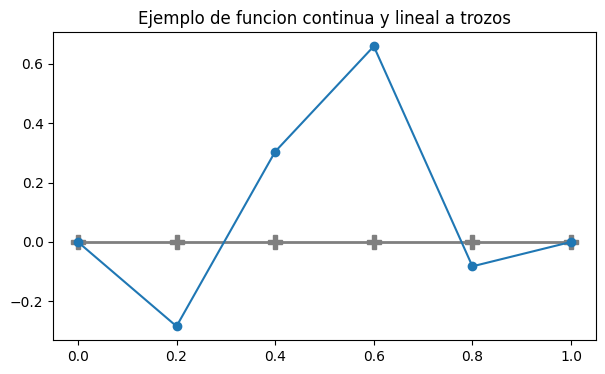

In [2]:
npoints=6
x = np.linspace(0,1,num = npoints);
u = np.hstack([0,-1+2*np.random.rand(npoints-2),0]);
fig1, ax1 = plt.subplots(1,1,figsize=(7,4))
ax1.plot(x, np.zeros(npoints), color='C7', linewidth=2)
ax1.plot(x, np.zeros(npoints), color='C7',marker='P',markersize = 10, linestyle='None')
ax1.set_title('Ejemplo de funcion continua y lineal a trozos')
plt.plot(x,u,'o-')
plt.show();

### Base de hat functions de V_h

Como mencionamos anteriormente, para escribir el problema como un sistema de ecuaciones necesitamos escoger una base del espacio $V_{h}$. La base estandar se conoce como "hat functions" o funciones de Courant, definidas por

\begin{equation}
\varphi_{j}\in V_{h}: \qquad \varphi_{j}(x_i) = \delta_{i j} \quad \mbox{para } i,j = 0,...,n
\end{equation}

Observe que estas funciones solo tienen soporte en $K_{j-1}\cup K_{j}$.


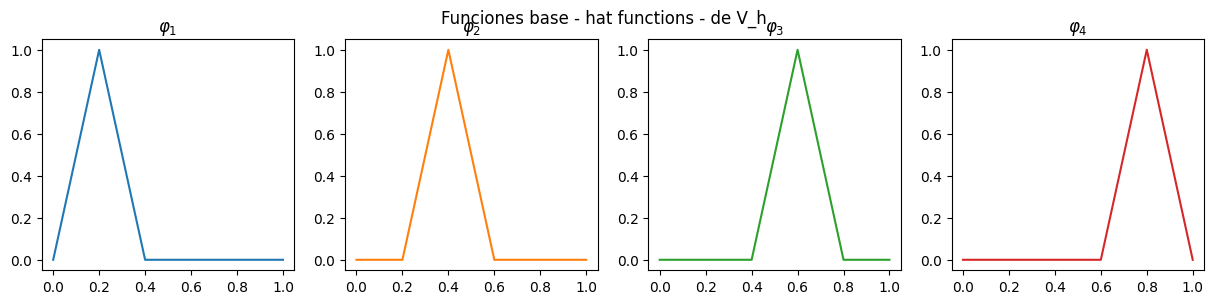

In [3]:
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(141); ax1.plot(x,np.array([0,1,0,0,0,0]),'C0'); ax1.title.set_text(r'$\varphi_1$');
ax2 = fig.add_subplot(142); ax2.plot(x,np.array([0,0,1,0,0,0]),'C1'); ax2.title.set_text(r'$\varphi_2$');
ax3 = fig.add_subplot(143); ax3.plot(x,np.array([0,0,0,1,0,0]),'C2'); ax3.title.set_text(r'$\varphi_3$');
ax4 = fig.add_subplot(144); ax4.plot(x,np.array([0,0,0,0,1,0]),'C3'); ax4.title.set_text(r'$\varphi_4$');

plt.suptitle('Funciones base - hat functions - de V_h')
plt.show()

Representamos toda funcion $v\in V_{h}$ en terminos de la base por

\begin{equation}
v(x) = \sum_{j=0}^{n} c_{j} \varphi_{j}(x),\quad x\in\Omega.
\end{equation}

Asi, el esquema de Galerkin se reduce al sistema de ecuaciones lineales : Hallar $u_h = \sum_{j=0}^{n} c_{j} \varphi_{j}\in V_h$ tal que 

\begin{equation}
a(u_h,\,\phi_{i}) = (f,\,\varphi_{i})\quad \mbox{para }i=0,...,n
\end{equation}

es un sistema lineal $Ac = b$, donde
\begin{equation}
A_{i,j} = a(\varphi_{j},\,\varphi_{i}),\qquad b_{i} = (f,\,\varphi_{i}),\quad \mbox{para }i,j = 0,..,n.
\end{equation}
    


### Malla uniforme
Observe que, en el caso $h_{j} = h$ para todo $j = 0,...,n-1$,, esto es la malla es uniforme, se sigue que

\begin{equation}
a(\varphi_{j}, \,\varphi_{i}) = \int_{\Omega} \varphi_{j}'\,\varphi_{i}' = \left\{ \begin{array}{cl} \frac{2}{h} & \mbox{si } i=j\\\frac{-1}{h}& \mbox{si } i=j-1 \mbox{ o } i = j+1\\
0& \mbox{en otro caso}\end{array}\right.
\end{equation}

In [4]:
# Triangulation 1d
class uniformmesh1d:
    def __init__(self, xi, xf, n):
        self.Coordinates = np.linspace(xi,xf,num = n+1)
        self.NN = self.Coordinates.size 
        self.Elements = np.vstack([range(n), range(1,n+1)]).T
        self.NE = self.Elements.shape[0]
        self.h = np.max([abs(self.Coordinates[j+1] - self.Coordinates[j]) for j in range(n)]) 

In [5]:
def Stiffness1dlocal(K):
    h = np.abs(K[1]-K[0])
    return 1.0/h*np.array([[1.0,-1.0],[-1.0,1.0]], dtype = np.float64 )
def forcing1dlocal(K,f):
    h = np.abs(K[1]-K[0])
    return np.array([h/6.0*(f(K[0]) + 4.0*f(0.5*(K[0]+K[1]))*0.5 ),
                     h/6.0*(4.0*f(0.5*(K[0]+K[1]))*0.5 + f(K[1]) )])

In [6]:
def fem1d_Poisson_LagrangeP1(mesh1d, f):
    # Load vector
    A = np.zeros((mesh1d.NN,mesh1d.NN), dtype=np.float64)
    b = np.zeros(mesh1d.NN, dtype=np.float64)
    for j in range(mesh1d.NE):
        K = mesh1d.Coordinates[mesh1d.Elements[j,:]];  h = abs(K[1]-K[0])
        # Local stiffness matrix # AK = integral(phi_i'*phi_j', I_j) 
        AK = Stiffness1dlocal(K)
        # Local load vector
        bK = forcing1dlocal(K,f)
        # Global Assembling
        b[mesh1d.Elements[j,:]] = b[mesh1d.Elements[j,:]] + bK
        for row_index, global_row_index in enumerate(mesh1d.Elements[j,:]):
            for col_index, global_col_index in enumerate(mesh1d.Elements[j,:]):
                A[global_row_index, global_col_index] += AK[row_index, col_index]
    return (A, b)

In [7]:
def fem1d_solver_LagrangeP1(mesh1d, f):
    
    # Solve linear system
    (A, b) = fem1d_Poisson_LagrangeP1(mesh1d, f)
    uh = np.zeros(mesh1d.NN,dtype=np.float64);
    Free = np.setdiff1d(range(mesh1d.NN),[0,mesh1d.NN-1]);
    AFree = A[Free, :][:, Free]
    bFree = b[Free]
    uh[Free] = np.linalg.solve(AFree, bFree)
    return uh

In [8]:
# 1D FEM for Poisson equation
# -u'' = f in (0,1), u(0) = u(1) = 0
xi = 0; xf = 1;
u  = lambda x: np.sin(2*np.pi*x)
du = lambda x: 2*np.pi*np.cos(2*np.pi*x)
f  = lambda x: (2*np.pi)**2*np.sin(2*np.pi*x)

mesh1d = uniformmesh1d(xi=0, xf=1, n=10)
uh = fem1d_solver_LagrangeP1( mesh1d, f)

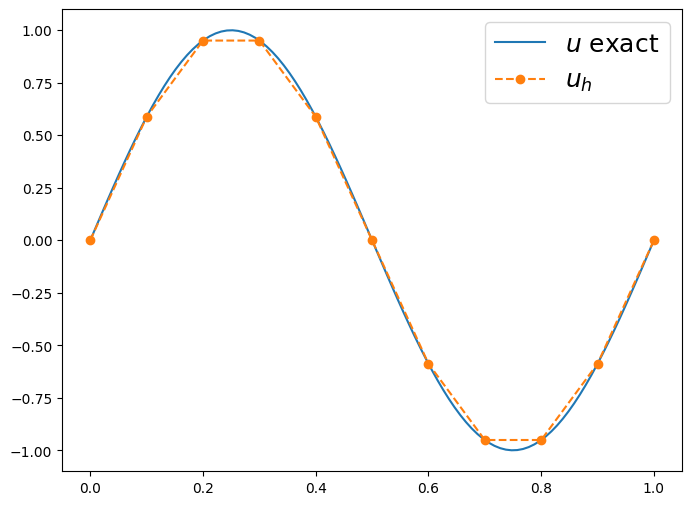

In [9]:
fix, ax = plt.subplots(1,1, figsize = (8,6))
x = np.linspace(0,1,100);
ax.plot(x, u(x), 'C0', label = r'$u$ exact')
ax.plot(mesh1d.Coordinates,uh, marker = 'o', linestyle ='--', color='C1', label = r'$u_h$') 
#ax.legend(['exact', 'uh at nodes'])
ax.legend(loc='upper right', prop={'size': 18})
plt.show()

## FEM 2d

In [10]:
# Triangulation 2d
class mesh2d:
    def __init__(self, Coordinates, Elements3):
        self.Coordinates = Coordinates
        self.NN = self.Coordinates.size 
        self.Elements = Elements3
        self.NE = self.Elements.shape[0]

In [12]:
def mapBK(K):
    return np.array([[K[1,0]-K[0,0],K[2,0]-K[0,0]],[K[1,1]-K[0,1],K[2,1]-K[0,1]]], dtype=np.float64)
def Stiffness2dlocal(K):
    BK = mapBK(K)
    BKinv = np.lianlg.inv(BK)
    CK = BKinv@BKinv.T
    K11 = 0.5*np.array([[1,-1,0],[-1,1,0],[0,0,0]], dtype=np.float64)
    K22 = 0.5*np.array([[1,0,-1],[0,0,0],[-1,0,1]], dtype=np.float64)
    K12 = 0.5*np.array([[1,0,-1],[-1,0,1],[0,0,0]], dtype=np.float64)
    return np.linalg.det(BK)*(CK[0,0]*K11 + CK[1,1]*K22 + C[0,1]*(K12+K12.T))
def forcing2dlocal(K,f):
    bK = (K[0,:]+K[1,:]+K[2,:])/3.0
    BK = mapBK(K)
    return np.linalg.det(BK)/6.0*f(bK)

In [ ]:
def fem2d_Poisson_LagrangeP1(meshd, f):
    # Load vector
    A = np.zeros((mesh2d.NN,mesh2d.NN), dtype=np.float64)
    b = np.zeros(mesh2d.NN, dtype=np.float64)
    for j in range(mesh2d.NE):
        K = mesh2d.Coordinates[mesh1d.Elements[j,:],:]; 
        # Local stiffness matrix # AK = integral(grad phi_i* grad phi_j', K) 
        AK = Stiffness2dlocal(K)
        # Local load vector
        bK = forcing2dlocal(K,f)
        # Global Assembling
        b[mesh2d.Elements[j,:]] = b[mesh2d.Elements[j,:]] + bK
        for row_index, global_row_index in enumerate(mesh1d.Elements[j,:]):
            for col_index, global_col_index in enumerate(mesh1d.Elements[j,:]):
                A[global_row_index, global_col_index] += AK[row_index, col_index]
    return (A, b)